In [1]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan=pd.read_csv('loan.csv',low_memory=False)

In [3]:
#details of companies data frame
pd.options.display.max_rows = 999
print(loan.info())
print('\n')
print(loan.describe())
print('\n')
print(loan.shape)
print('\n')
print(loan.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std   

In [4]:
#column-wise null percentages here
pd.options.display.max_rows = 999
print(round(100*(loan.isnull().sum()/len(loan.index)),2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [5]:
loan.drop(loan.iloc[:, 57:78], inplace=True, axis=1)
loan.drop(loan.iloc[:, 59:84], inplace=True, axis=1)
loan.drop(loan.iloc[:, 61:65], inplace=True, axis=1)

In [6]:
len(loan.index)/39717

1.0

In [7]:
#details of companies data frame
print(loan.info())
print('\n')
print(loan.describe())
print('\n')
print(loan.shape)
print('\n')
print(loan.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 61 columns):
id                             39717 non-null int64
member_id                      39717 non-null int64
loan_amnt                      39717 non-null int64
funded_amnt                    39717 non-null int64
funded_amnt_inv                39717 non-null float64
term                           39717 non-null object
int_rate                       39717 non-null object
installment                    39717 non-null float64
grade                          39717 non-null object
sub_grade                      39717 non-null object
emp_title                      37258 non-null object
emp_length                     38642 non-null object
home_ownership                 39717 non-null object
annual_inc                     39717 non-null float64
verification_status            39717 non-null object
issue_d                        39717 non-null object
loan_status                    39717 non-nul

In [8]:
#column-wise null percentages here
print(round(100*(loan.isnull().sum()/len(loan.index)),2))

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        6.19
emp_length                       2.71
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
loan_status                      0.00
pymnt_plan                       0.00
url                              0.00
desc                            32.58
purpose                          0.00
title                            0.03
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_

In [9]:
#here i have dropped the attributes with same/not-changing values accross data points , redundant information of columns 

loan=loan.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','initial_list_status','desc','url','pymnt_plan'],axis=1)



In [10]:
len(loan.index)/39717

1.0

In [11]:
#column-wise null percentages here
print(round(100*(loan.isnull().sum()/len(loan.index)),2))

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util          

In [12]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec     

In [13]:
#here i have removed % symbol and have typecasted the attribute to float type so as to facilitate numerical analysis

loan['int_rate'] = loan['int_rate'].str.rstrip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.rstrip('%').astype('float')

In [14]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000000,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.000000,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.000000,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.000000,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.000000,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.000000,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.000000,60 months,15.96,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.000000,36 months,18.64,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.000000,60 months,21.28,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.000000,60 months,12.69,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
#here i have stripped off 'months' from the attribute term so as to facilitate to numerical analysis. I have also typecasted the same to integer type.
loan['term'] = loan['term'].str.rstrip('months').astype('int')
loan['issue_d']=pd.to_datetime(loan.issue_d,format='%b-%y')
loan['last_pymnt_d']=pd.to_datetime(loan.last_pymnt_d,format='%b-%y')
loan['issue_y']=loan['issue_d'].dt.year
loan['last_pymnt_y']=loan['last_pymnt_d'].dt.year


## Univariate and Segmented Univariate Analysis starts 

Text(0.5,1,'Number of Loans issued year wise ')

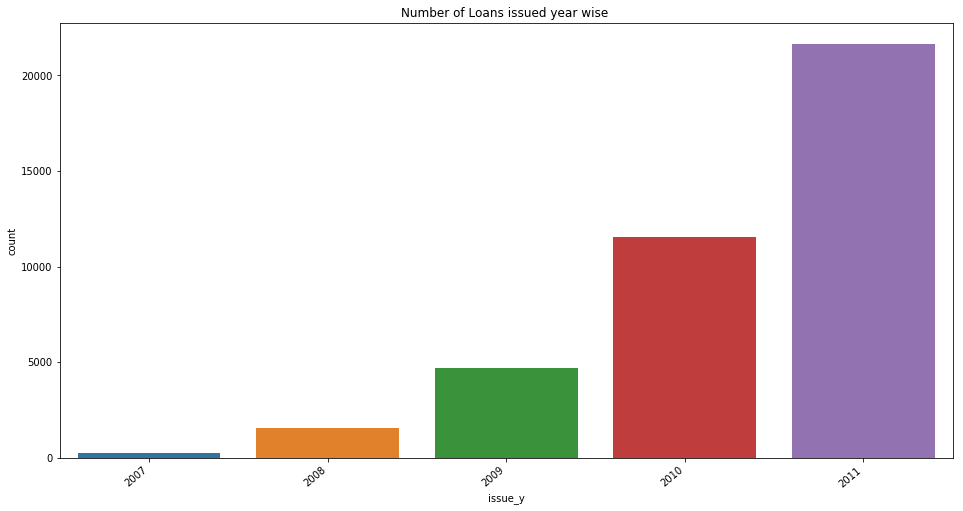

In [16]:
# Number of Loans issued per Year  
plt.figure(figsize=(16,8))
ax=sns.countplot(x='issue_y', data=loan)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Number of Loans issued year wise ')

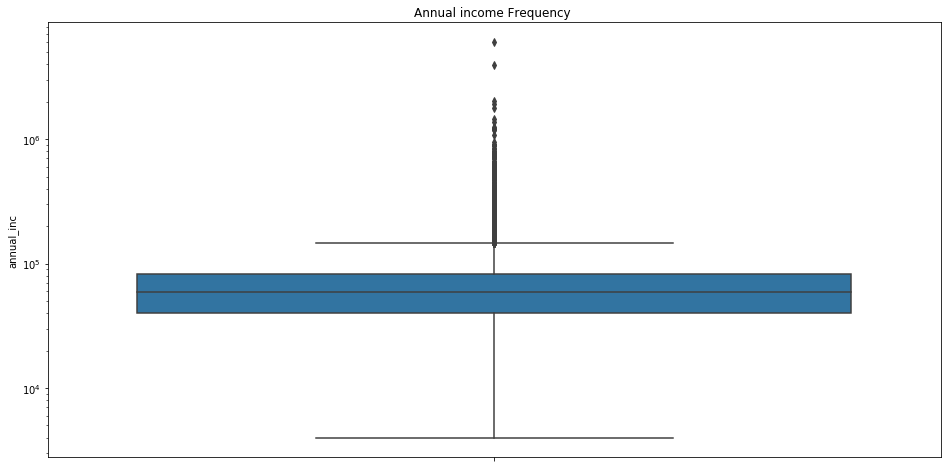

In [17]:
#from visual inspection we see that in annual_inc there is some outlies present so we will analyse this 
#through quantile function
plt.figure(figsize=(16,8))
ax=sns.boxplot(y=loan['annual_inc'])
plt.yscale('log')
ax.set_title('Annual income Frequency ')
plt.show()

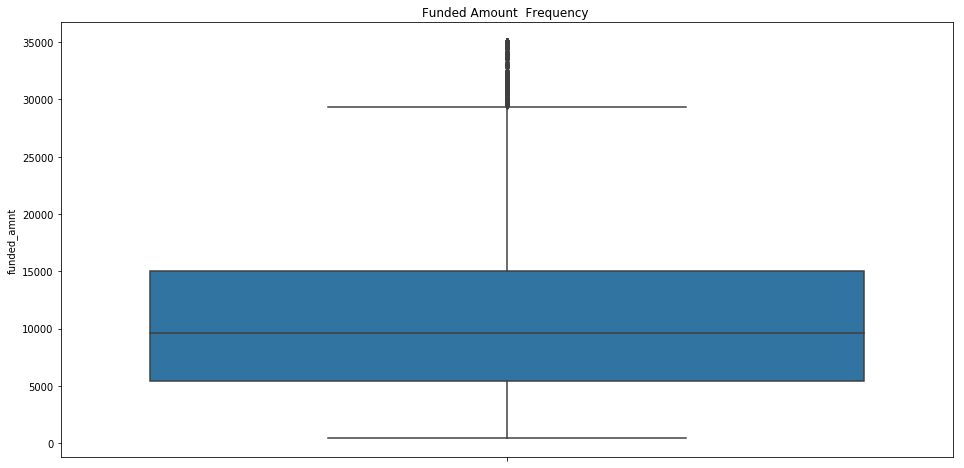

In [18]:
#we see that 75% of the annual income are with in 78000 the rest are may be outliers
#in order to accurately understand the outliers we will use boxplot on all continuous variables
plt.figure(figsize=(16,8))
ax=sns.boxplot(y=loan['funded_amnt'])
ax.set_title("Funded Amount  Frequency ")
plt.show()

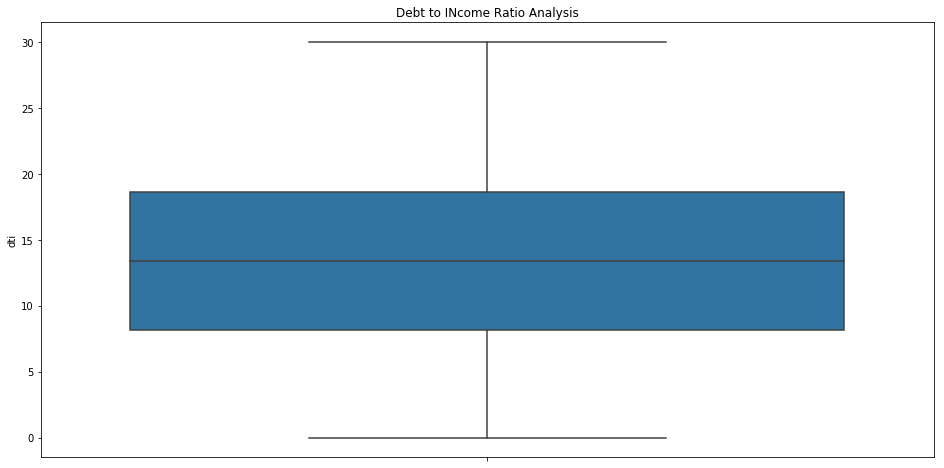

In [19]:
# PLot to look at the range of debt to income ratio
plt.figure(figsize=(16,8))
ax=sns.boxplot(y=loan['dti'])
ax.set_title("Debt to INcome Ratio Analysis")
plt.show()

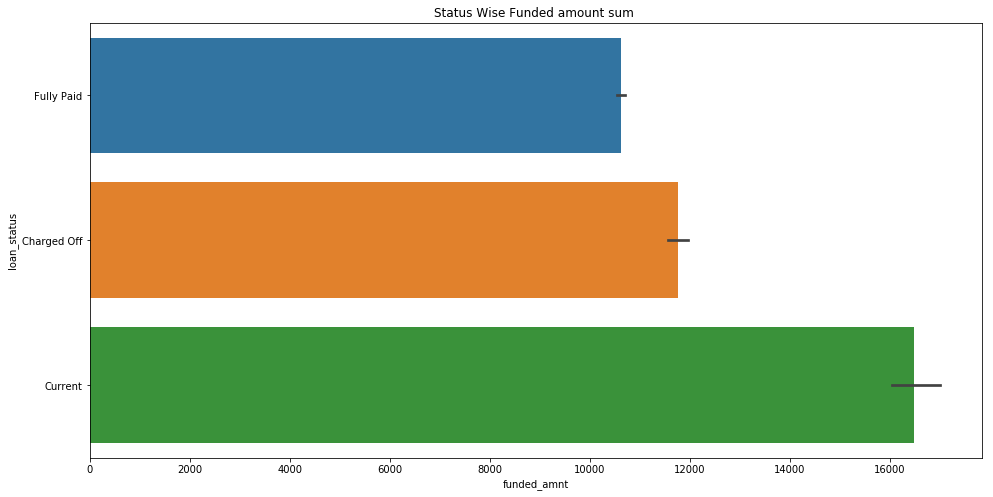

In [20]:
plt.figure(figsize=(16,8))
ax=sns.barplot(x='funded_amnt', y='loan_status', data=loan)
ax.set_title("Status Wise Funded amount sum ")
plt.show()

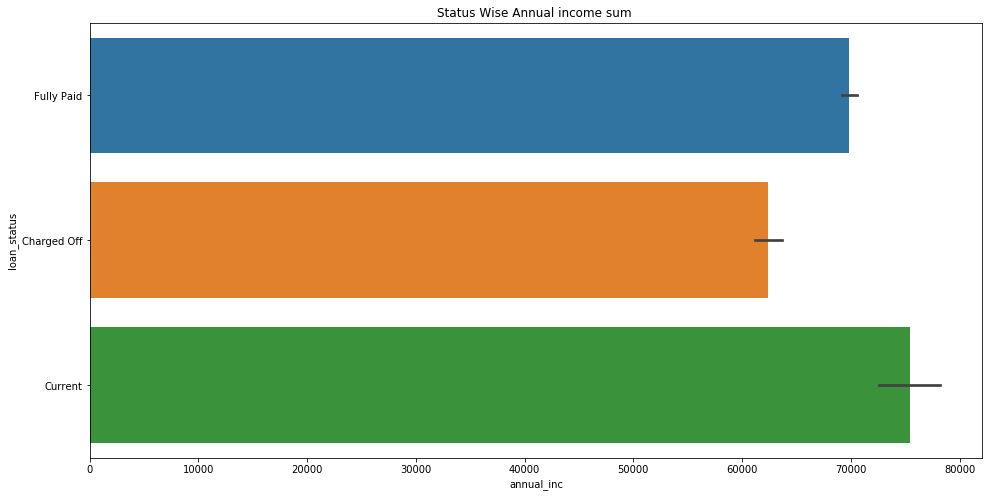

In [21]:
plt.figure(figsize=(16,8))
ax=sns.barplot(x='annual_inc', y='loan_status', data=loan)
ax.set_title("Status Wise Annual income sum ")
plt.show()

(-1.1051161873593136,
 1.10546019153209,
 -1.1061675121252426,
 1.1002936962138339)

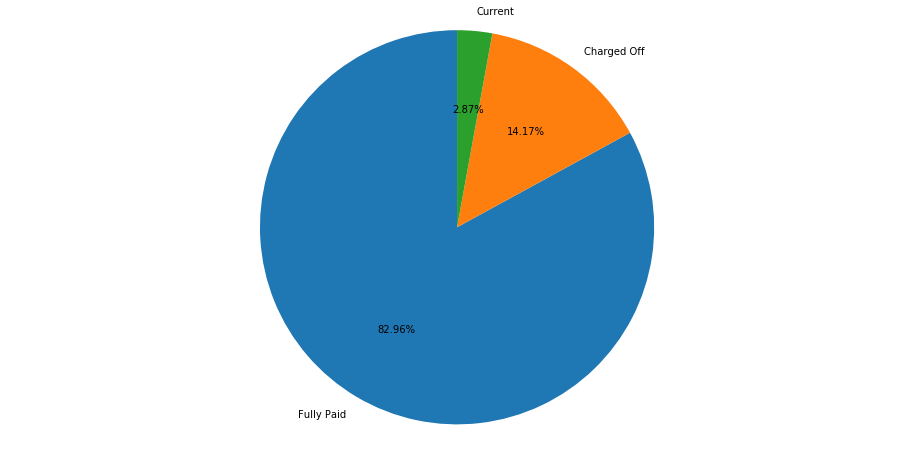

In [22]:
# percentage breakup of loan status 
plt.figure(figsize=(16,8))
df=pd.DataFrame(loan.loan_status.value_counts())
labels = df.index.values
sizes = df['loan_status'].values
plt.pie(sizes, labels=labels,  startangle=90, autopct='%1.2f%%')
plt.axis('equal')

(-1.1062775228057435,
 1.102174950073548,
 -1.1051304655411311,
 1.1143074258412777)

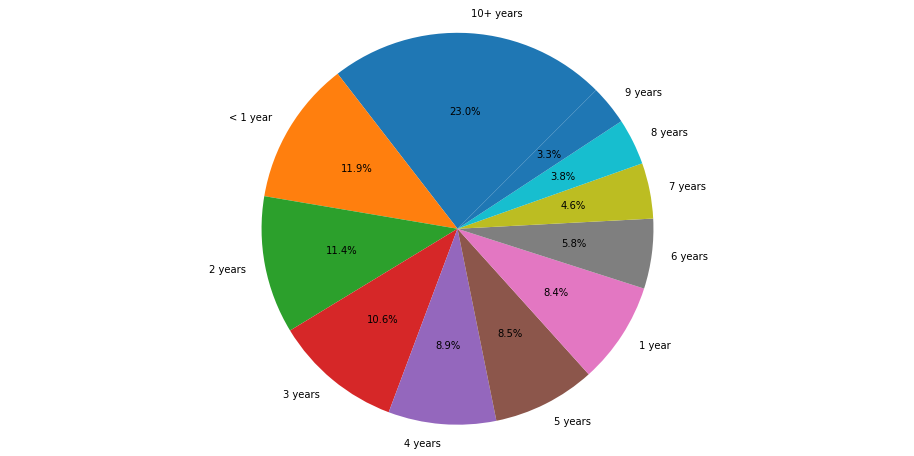

In [23]:
# Percentage wise emp_length 
plt.figure(figsize=(16,8))
df=pd.DataFrame(loan.emp_length.value_counts())
labels = df.index.values
sizes = df['emp_length'].values
plt.pie(sizes, labels=labels,  startangle=45, autopct='%.1f%%')
plt.axis('equal')

In [24]:
# ONly 14 % data from the available data set is defaulted so the conditions derived will be from that 14 %
loan_paid=loan.loc[loan.loan_status== 'Fully Paid']
loan_ongoing=loan.loc[loan.loan_status== 'Current']
loan_defaulted=loan.loc[loan.loan_status== 'Charged Off']
print (loan_paid.head(10))
print('\n')
print (loan_ongoing.head(10))
print('\n')
print (loan_defaulted.head(10))

         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0   1077501    1296599       5000         5000           4975.0    36   
2   1077175    1313524       2400         2400           2400.0    36   
3   1076863    1277178      10000        10000          10000.0    36   
5   1075269    1311441       5000         5000           5000.0    36   
6   1069639    1304742       7000         7000           7000.0    60   
7   1072053    1288686       3000         3000           3000.0    36   
10  1070078    1305201       6500         6500           6500.0    60   
11  1069908    1305008      12000        12000          12000.0    36   
13  1069866    1304956       3000         3000           3000.0    36   
15  1069759    1304871       1000         1000           1000.0    36   

    int_rate  installment grade sub_grade     ...       \
0      10.65       162.87     B        B2     ...        
2      15.96        84.33     C        C5     ...        
3      13.49       339

Text(0,0.5,'Frequency')

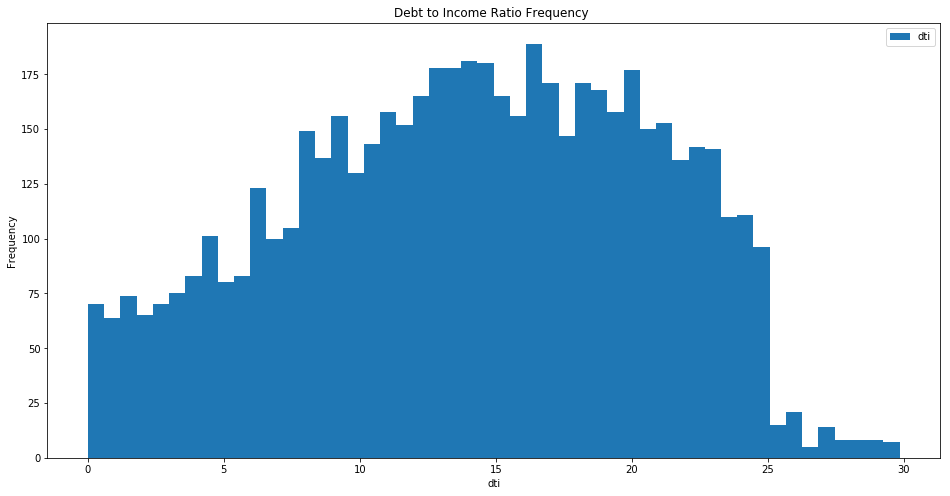

In [25]:
plt.figure(figsize=(16,8))
plt.hist([loan_defaulted.dti],bins=50)
legend = ['dti']
plt.legend(legend)
plt.title("Debt to Income Ratio Frequency ")
plt.xlabel("dti")
plt.ylabel("Frequency")

Text(0.5,1,'Count of Revolving line Utilization Rate ')

<Figure size 1152x576 with 0 Axes>

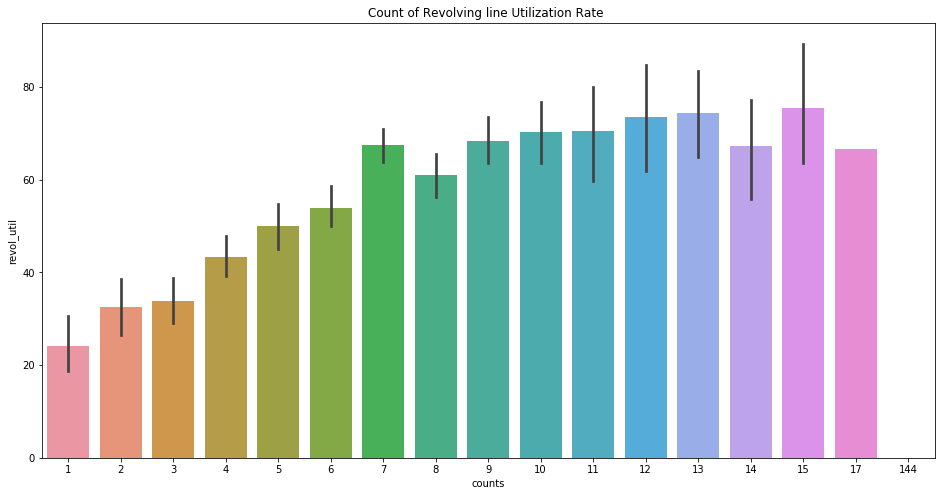

In [26]:

plt.figure(figsize=(16,8))
#sns.countplot(x='annual_inc', data=loan_defaulted)
df_revol_util=loan_defaulted.groupby(['revol_util']).size().reset_index(name='counts')
plt.figure(figsize=(16,8))
ax=sns.barplot(x="counts",y="revol_util",data=df_revol_util)
ax.set_title('Count of Revolving line Utilization Rate ')

Text(0.5,1,'Count on the basis of experience ')

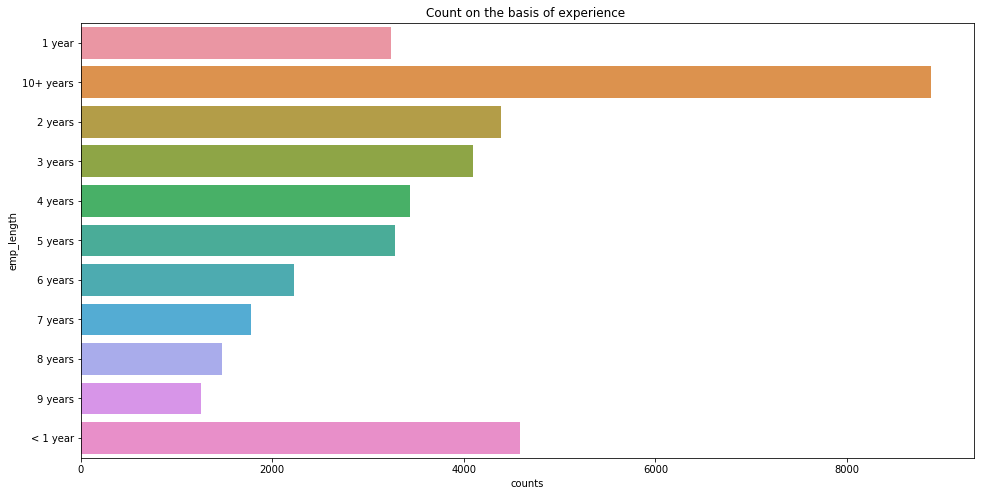

In [27]:
df_emp=loan.groupby(['emp_length']).size().reset_index(name='counts')
plt.figure(figsize=(16,8))
ax=sns.barplot(x="counts",y="emp_length",data=df_emp)
ax.set_title('Count on the basis of experience ')

(-1.1053202274571452,
 1.102111409191232,
 -1.103894090928277,
 1.1031101392924993)

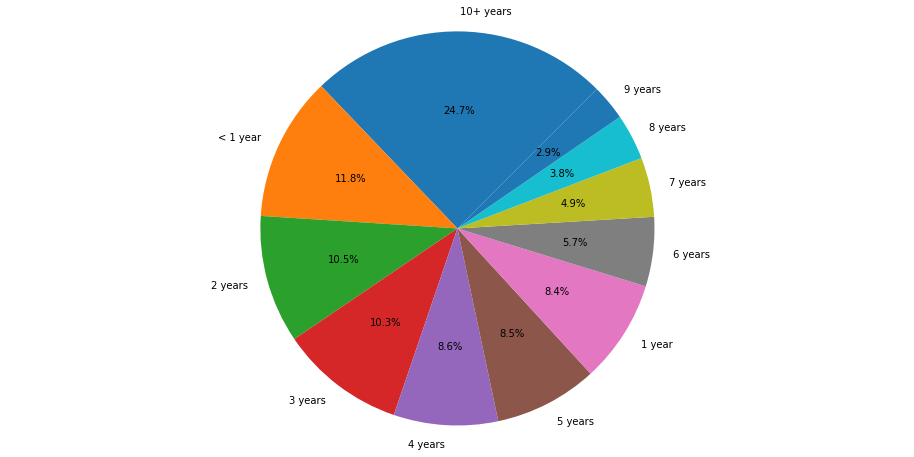

In [28]:
# Now from the above graph we can identify that the employees having more that 10 years experience are defauting more 
plt.figure(figsize=(16,8))
df=pd.DataFrame(loan_defaulted.emp_length.value_counts())
labels = df.index.values
sizes = df['emp_length'].values
plt.pie(sizes, labels=labels,  startangle=45, autopct='%.1f%%')
plt.axis('equal')
# This plot shows us that out of the 24 %  of total defaulted id's have experience more that 10 years 

Text(0,0.5,'Frequency')

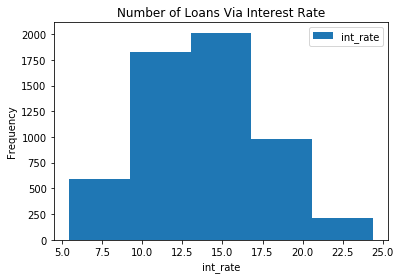

In [29]:
plt.hist([loan_defaulted.int_rate],bins=5)
legend = ['int_rate']
plt.legend(legend)
plt.title("Number of Loans Via Interest Rate")
plt.xlabel("int_rate")
plt.ylabel("Frequency")

Text(0,0.5,'No of Loans')

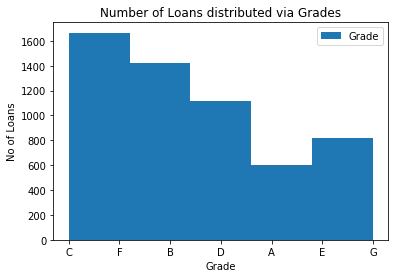

In [30]:
plt.hist([loan_defaulted.grade],bins=5)
legend = ['Grade']
plt.legend(legend)
plt.title("Number of Loans distributed via Grades")
plt.xlabel("Grade")
plt.ylabel("No of Loans")

Text(0,0.5,'Frequency')

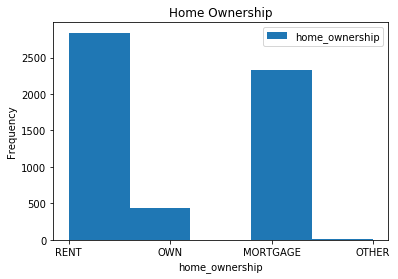

In [31]:

plt.hist([loan_defaulted.home_ownership],bins=5)
legend = ['home_ownership']
plt.legend(legend)
plt.title("Home Ownership")
plt.xlabel("home_ownership")
plt.ylabel("Frequency")

Text(0.5,1,'Region wise counts ')

<Figure size 1152x576 with 0 Axes>

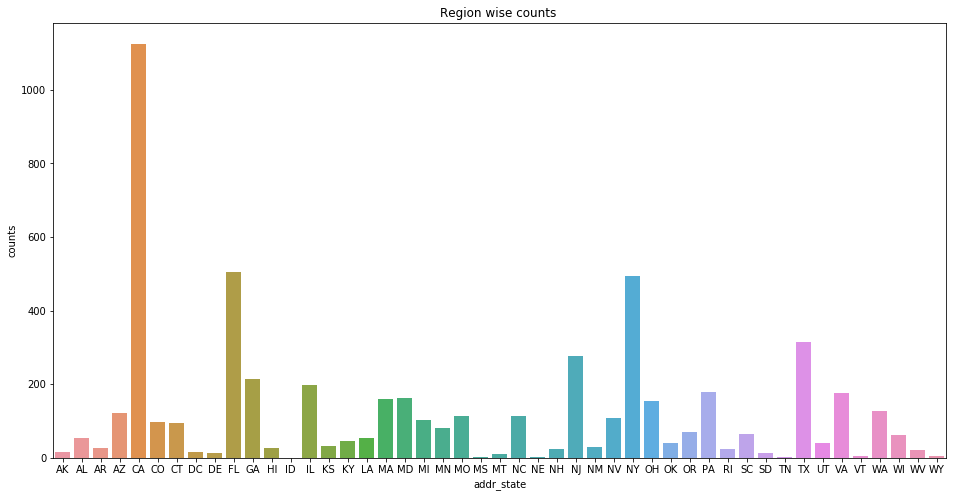

In [32]:
plt.figure(figsize=(16,8))
df_area=loan_defaulted.groupby(['addr_state']).size().reset_index(name='counts')
plt.figure(figsize=(16,8))
ax=sns.barplot(x="addr_state",y="counts",data=df_area)
ax.set_title('Region wise counts ')

Text(0.5,1,'Number of applicants with term')

<Figure size 1152x576 with 0 Axes>

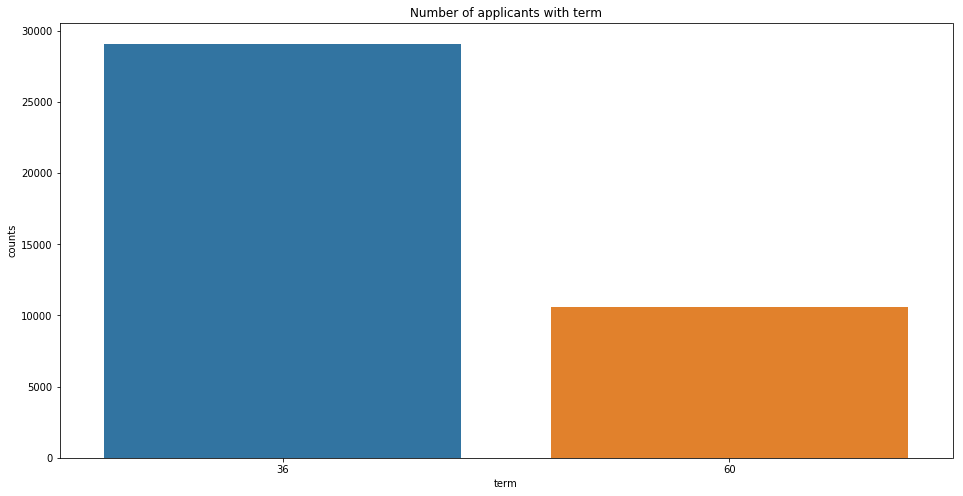

In [33]:
plt.figure(figsize=(16,8))
#sns.countplot(x='annual_inc', data=loan_defaulted)
df_term=loan.groupby(['term']).size().reset_index(name='counts')
plt.figure(figsize=(16,8))
ax=sns.barplot(x="term",y="counts",data=df_term)
ax.set_title('Number of applicants with term')

In Segmented Univariate and Univariate analysis following are the conclusions

ON the basis of above  analysis we can conclude that
dti ,
number of years of employment,
Term of Loan ,
purpose ,region 
Grade,revol_util 
can be  the factors which will impact our reviewing of loan 

## Bivariate Analysis Starts

Text(0.5,1,'Number of applicants with term for diffrent Region')

<Figure size 1152x576 with 0 Axes>

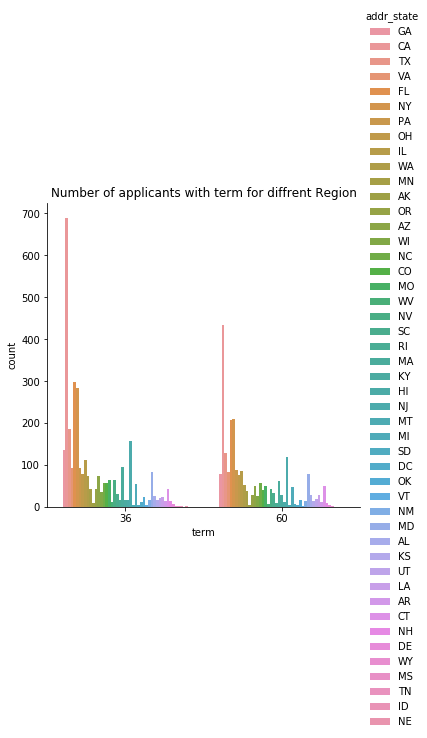

In [34]:
# Plot realtionship between region and term
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "term", hue = "addr_state" ,data = loan_defaulted, kind = "count")
plt.title('Number of applicants with term for diffrent Region')
# As we can observe for both the terms some particular regions have more loan defauters 

Text(0.5,1,'Count of applicatiants on basis of term and years of experience')

<Figure size 1152x576 with 0 Axes>

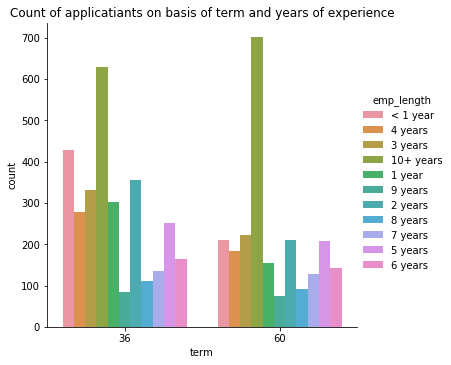

In [35]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "term", hue = "emp_length" ,data = loan_defaulted, kind = "count")
plt.title('Count of applicatiants on basis of term and years of experience')

Text(0.5,1,'Count of applicatiants on basis of grade and years of experience')

<Figure size 1152x576 with 0 Axes>

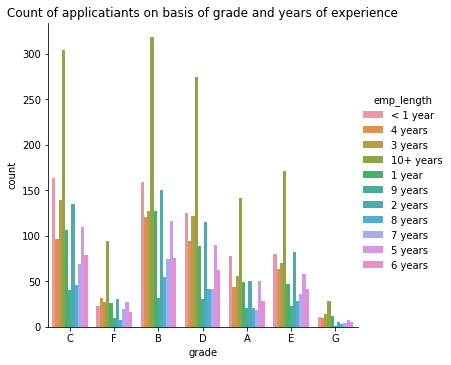

In [36]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "grade", hue = "emp_length" ,data = loan_defaulted, kind = "count")
plt.title('Count of applicatiants on basis of grade and years of experience')

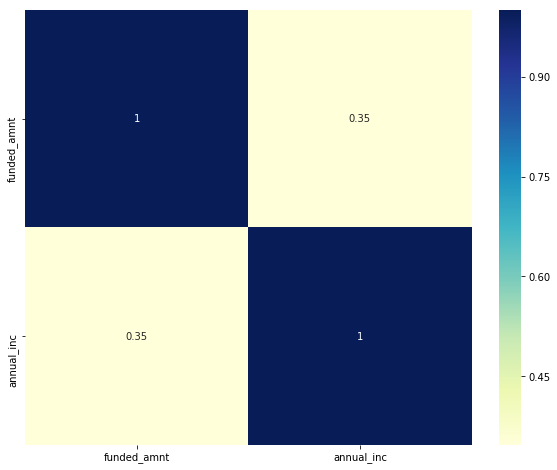

In [37]:
# Finding the corelation between funded_amnt,annual_inc
df_amt = loan_defaulted.loc[:,['funded_amnt','annual_inc']]
cor = df_amt.corr()
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

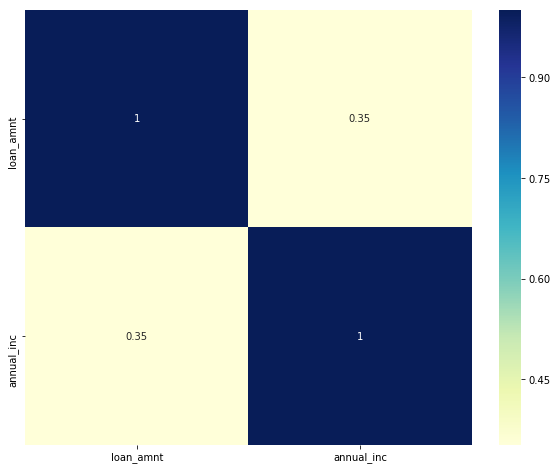

In [38]:
# Finding the corelation between loan_amnt,annual_inc
df_amt = loan_defaulted.loc[:,['loan_amnt','annual_inc']]
cor = df_amt.corr()
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [39]:
df_stat = loan.groupby('loan_status')['funded_amnt','annual_inc'].sum()
df_stat

,funded_amnt,annual_inc
loan_status,,
Charged Off,66136375,3.512784e+08
Current,18793700,8.599096e+07
Fully Paid,349880250,2.301969e+09


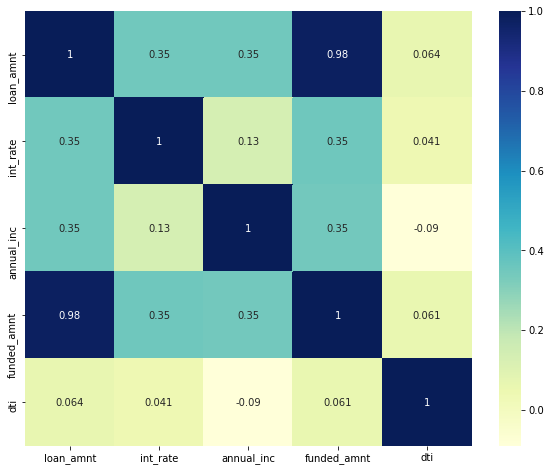

In [40]:
# Finding the corelation between diffrent numberical variables
df_amt = loan_defaulted.loc[:,['loan_amnt','int_rate','annual_inc','funded_amnt','dti']]
cor = df_amt.corr()
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


<Figure size 1152x576 with 0 Axes>

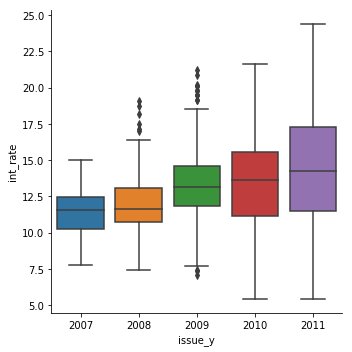

In [41]:
# Interst Rate Plots
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "issue_y",y = "int_rate" ,data = loan_defaulted, kind = "box")

Text(0.5,1,'Interst rate over the years')

<Figure size 1152x576 with 0 Axes>

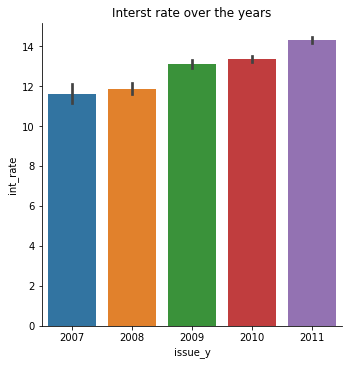

In [42]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "issue_y",y = "int_rate" ,data = loan_defaulted, kind = "bar")
plt.title("Interst rate over the years")

<Figure size 1152x576 with 0 Axes>

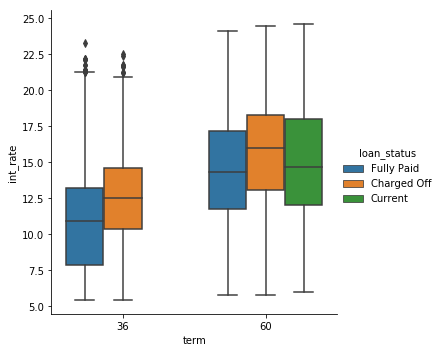

In [43]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "term",y = "int_rate",hue = "loan_status",data = loan, kind = "box")

<Figure size 1152x576 with 0 Axes>

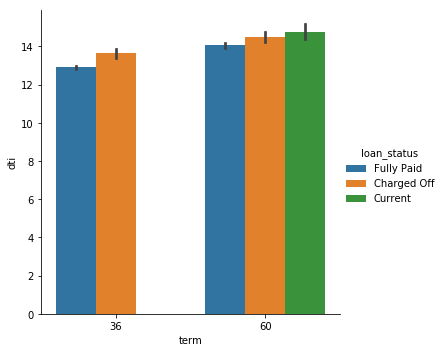

In [44]:
# DTI Plot
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "term",y = "dti",hue = "loan_status",data = loan, kind = "bar")

<Figure size 1440x1440 with 0 Axes>

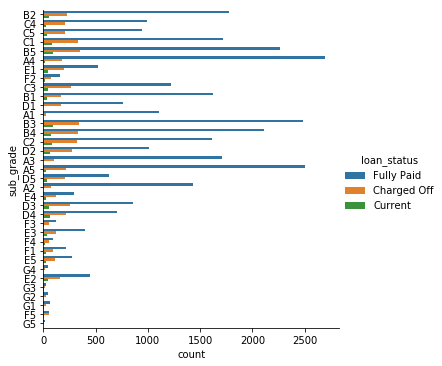

In [45]:
# Sub Grade Plot
plt.figure(figsize=(20,20))
ax=sns.catplot(y = "sub_grade",hue = "loan_status",data = loan, kind = "count")

<Figure size 1440x1440 with 0 Axes>

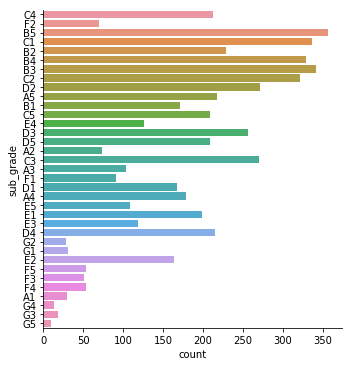

In [46]:
plt.figure(figsize=(20,20))
ax=sns.catplot(y = "sub_grade",data = loan_defaulted, kind = "count")

<Figure size 1440x720 with 0 Axes>

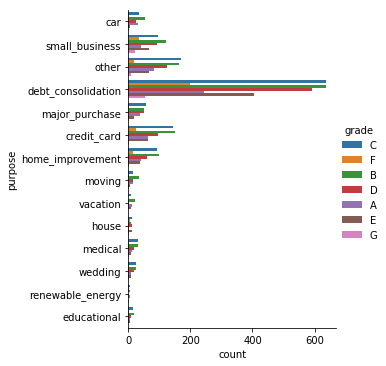

In [47]:
# Loan Purpose Plots
plt.figure(figsize=(20,10))
ax=sns.catplot(y = "purpose" ,hue="grade",data = loan_defaulted, kind = "count")

<Figure size 1440x720 with 0 Axes>

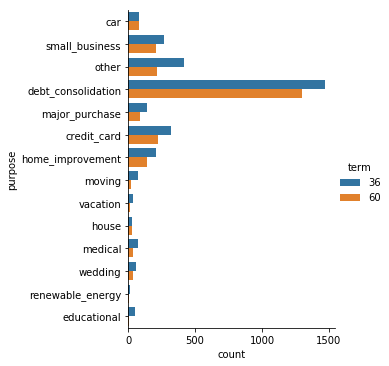

In [48]:
plt.figure(figsize=(20,10))
ax=sns.catplot(y = "purpose" ,hue="term",data = loan_defaulted, kind = "count")

In [49]:
len(loan_defaulted.loc[loan_defaulted.addr_state == "CA"])/len(loan_defaulted.index)

0.19992891416385286

In [50]:
len(loan_defaulted.loc[loan_defaulted.grade == "B"])/len(loan_defaulted.index)

0.25324329127421363

In [51]:
len(loan_defaulted.loc[(loan_defaulted.addr_state == "CA") & (loan_defaulted.emp_length == "10+ years")])/len(loan_defaulted.index)

0.04549493513417452

In [52]:
len(loan_defaulted.loc[(loan_defaulted.grade == "B") & (loan_defaulted.term == 36)])/len(loan_defaulted.index)

0.17504887151235116

In [53]:
len(loan_defaulted.loc[(loan_defaulted.grade == "B") & (loan_defaulted.sub_grade == 'B5')])/len(loan_defaulted.index)

0.06326639417096143

<Figure size 1440x1440 with 0 Axes>

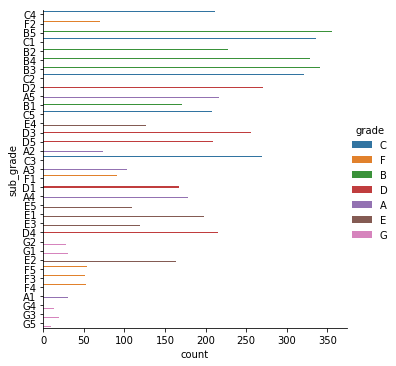

In [54]:
plt.figure(figsize=(20,20))
ax=sns.catplot(y= "sub_grade",hue = "grade",data = loan_defaulted, kind = "count")

<Figure size 1152x576 with 0 Axes>

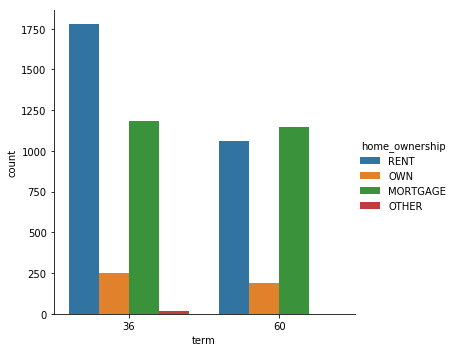

In [55]:
# Home Ownetship Plots
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "term", hue = "home_ownership" ,data = loan_defaulted, kind = "count")

<Figure size 1152x576 with 0 Axes>

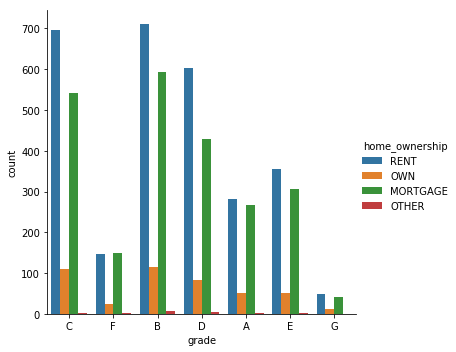

In [56]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "grade", hue = "home_ownership" ,data = loan_defaulted, kind = "count")

<Figure size 1152x576 with 0 Axes>

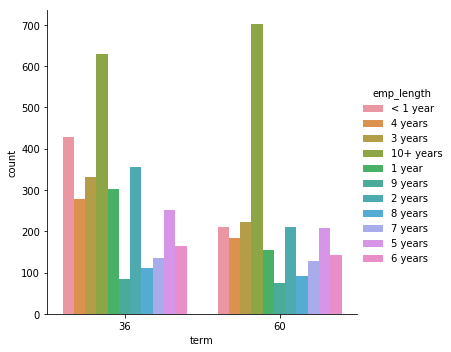

In [57]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "term", hue = "emp_length" ,data = loan_defaulted, kind = "count")

<Figure size 1152x576 with 0 Axes>

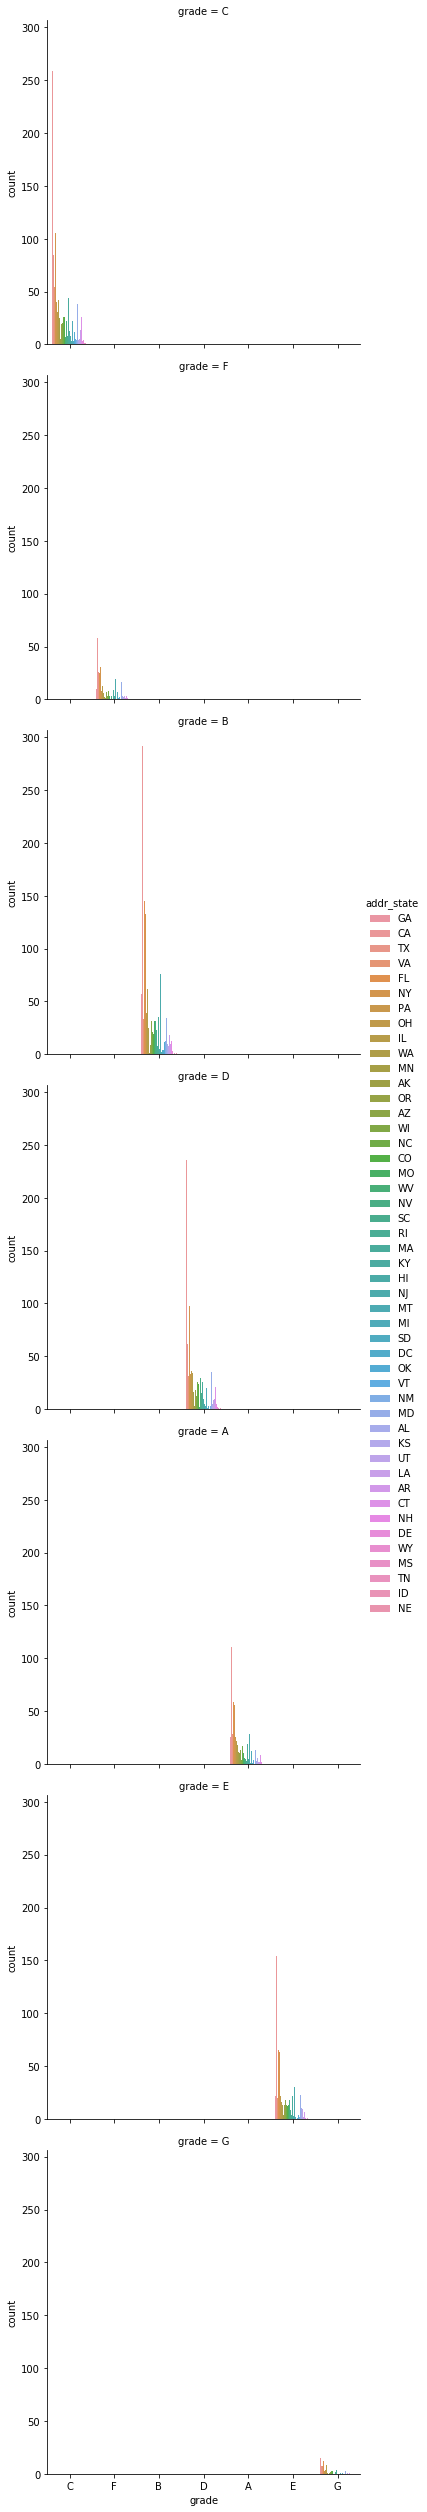

In [58]:
plt.figure(figsize=(16,8))
ax=sns.catplot(x = "grade",hue = "addr_state" ,row = "grade",data = loan_defaulted, kind = "count")

<Figure size 1440x720 with 0 Axes>

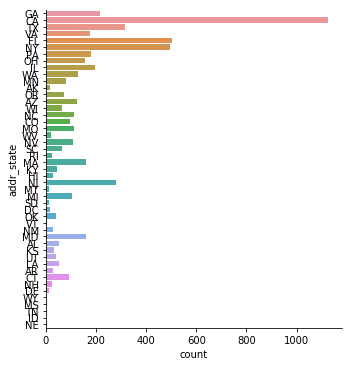

In [59]:
plt.figure(figsize=(20,10))
BDefault = loan_defaulted.loc[loan_defaulted.grade == "B"]
ax=sns.catplot(y = "addr_state" ,data = loan_defaulted, kind = "count")

<Figure size 1440x720 with 0 Axes>

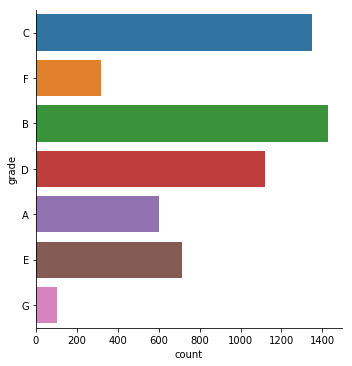

In [60]:
plt.figure(figsize=(20,10))
CADefault = loan_defaulted.loc[loan_defaulted.addr_state == "CA"]
ax=sns.catplot(y = "grade" ,data = loan_defaulted, kind = "count")

In [61]:
len(loan.loc[loan.loan_status== 'Charged Off'])/len(loan.index)*100

14.167736737417227

In [62]:
len(loan.loc[loan.emp_length == '10+ years'])/len(loan.index)*100

22.355666339350908

In [63]:
len(loan_defaulted.loc[((loan_defaulted.emp_length == '10+ years') |(loan_defaulted.emp_length == '2 years')|(loan_defaulted.emp_length == '3 years')|(loan_defaulted.emp_length == '<1 year'))&(loan_defaulted.dti<30)&(loan_defaulted.int_rate >=6)& (loan_defaulted.term==36)&((loan_defaulted.purpose=='debt_consolidation')|(loan_defaulted.purpose=='credit_card')|(loan_defaulted.purpose=='home_improvement')|(loan_defaulted.purpose=='other'))])/len(loan_defaulted.index)*100

17.416029856051182

In [64]:
 len(loan_paid.loc[loan_paid.emp_length == '10+ years'])/len(loan_paid.index)*100

21.720789074355086

In [65]:
loan_defaulted.loc[loan_defaulted.emp_length == '10+ years'].funded_amnt.max()

35000

In [66]:
# Percentage of defaulted  loans on the basis of conditions 
    
len(loan_defaulted.loc[(loan_defaulted.dti<30)&(loan_defaulted.int_rate >=6)& (loan_defaulted.term==36)&((loan_defaulted.purpose=='debt_consolidation')|(loan_defaulted.purpose=='credit_card')|(loan_defaulted.purpose=='home_improvement')|(loan_defaulted.purpose=='other'))&(loan_defaulted.revol_util>=20)])/len(loan_defaulted.index)*100

37.231206682068596